In [1]:
import pandas as pd
%matplotlib inline

<img src="http://www.bom.gov.au/climate/enso/indices/oceanic-indices-map.gif">

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y%m%d')

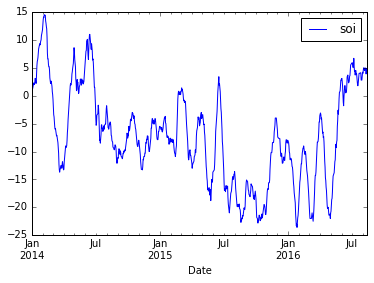

In [3]:
soi = pd.read_csv('http://www.bom.gov.au/climate/enso/soi.txt', parse_dates=True, 
                 date_parser=dateparse, header=None, usecols=[1,2], index_col=0, names=['Date','soi'])
soi = soi.resample('D').bfill()
soi.plot()

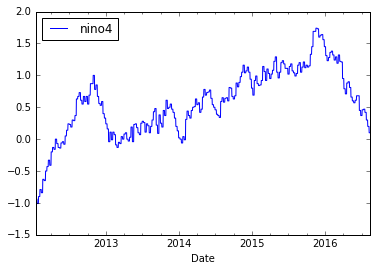

In [4]:
nino4 = pd.read_csv('http://www.bom.gov.au/climate/enso/nino_4.txt', parse_dates=True, 
                 date_parser=dateparse, header=None, usecols=[1,2], index_col=0, names=['Date','nino4'])
nino4 = nino4.resample('D').bfill()
nino4.plot()

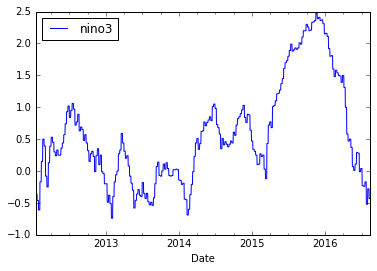

In [5]:
nino3 = pd.read_csv('http://www.bom.gov.au/climate/enso/nino_3.txt', parse_dates=True, 
                 date_parser=dateparse, header=None, usecols=[1,2], index_col=0, names=['Date','nino3'])
nino3 = nino3.resample('D').bfill()
nino3.plot()

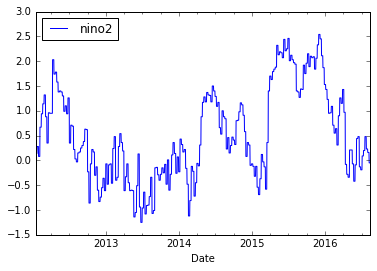

In [6]:
nino2 = pd.read_csv('http://www.bom.gov.au/climate/enso/nino_2.txt', parse_dates=True, 
                 date_parser=dateparse, header=None, usecols=[1,2], index_col=0, names=['Date','nino2'])
nino2 = nino2.resample('D').bfill()
nino2.plot()

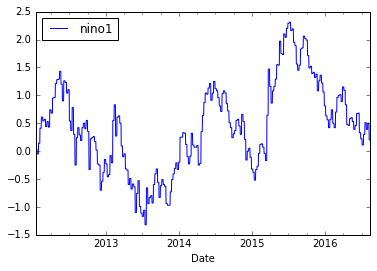

In [7]:
nino1 = pd.read_csv('http://www.bom.gov.au/climate/enso/nino_1.txt', parse_dates=True, 
                 date_parser=dateparse, header=None, usecols=[1,2], index_col=0, names=['Date','nino1'])
nino1 = nino1.resample('D').bfill()
nino1.plot()

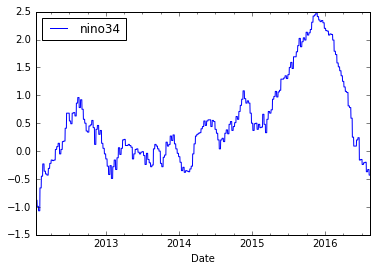

In [8]:
nino34 = pd.read_csv('http://www.bom.gov.au/climate/enso/nino_3.4.txt', parse_dates=True, 
                 date_parser=dateparse, header=None, usecols=[1,2], index_col=0, names=['Date','nino34'])
nino34 = nino34.resample('D').bfill()
nino34.plot()

In [9]:
# Crea df desde noaa
oni = pd.read_fwf('http://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt', widths=(6, 6, 6, 6))

# Diccionario temporada mes intermedio
#d = dict(oni.SEAS[:12])
#dd = {}
#for x in d.keys():
#    dd[d[x]] = x+1

dd = {'AMJ': 5, 'ASO': 9, 'DJF': 1, 'FMA': 3, 'JAS': 8, 'JFM': 2, 'JJA': 7, 'MAM': 4,
      'MJJ': 6, 'NDJ': 12, 'OND': 11, 'SON': 10}

# Reemplaza temporada por numero mes
oni.SEAS.replace(dd, inplace=True)

# Crea columna con inicio mes
oni['Date'] = oni.apply(lambda row: "%.f-%.f-1"%(row['YR'],row['SEAS']), axis=1)

# oni drop SEAS y YR
oni.drop(['SEAS', 'YR'], axis=1, inplace=True)

# Indice Date
oni['Date']  = pd.to_datetime(oni['Date'])
oni.set_index('Date', inplace=True)

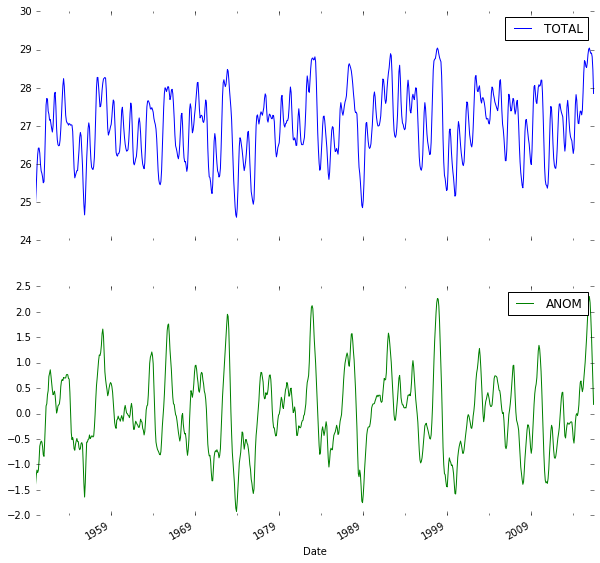

In [10]:
axes = oni.plot(figsize=(10, 10), subplots=True, sharex=True)
for ax in axes:
    ax.set_frame_on(False)

In [11]:
# Crea df desde noaa
url = 'http://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt'
nino34 = pd.read_csv(url, sep='\s+')

# Crea columna con inicio mes
nino34['Date'] = nino34.apply(lambda row: "%.f-%.f-1"%(row['YR'],row['MON']), axis=1)

# nino34 drop SEAS y YR
nino34.drop(['MON', 'YR'], axis=1, inplace=True)

# Indice Date
nino34['Date']  = pd.to_datetime(nino34['Date'])
nino34.set_index('Date', inplace=True)

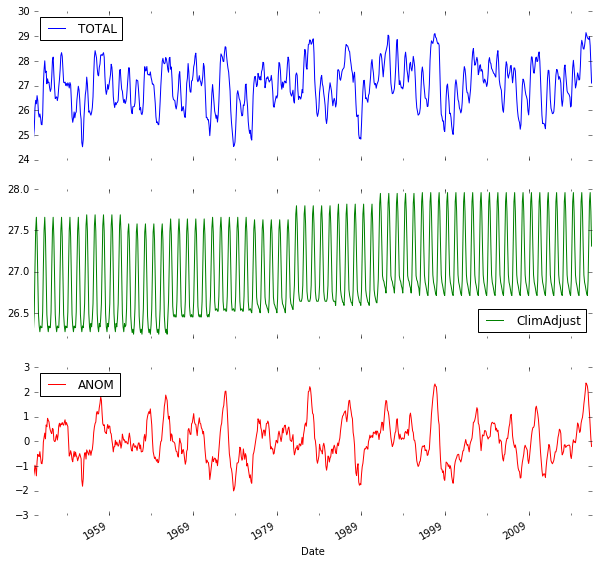

In [12]:
axes = nino34.plot(subplots=True, sharex=True, figsize=(10,10))
for ax in axes:
    ax.set_frame_on(False)

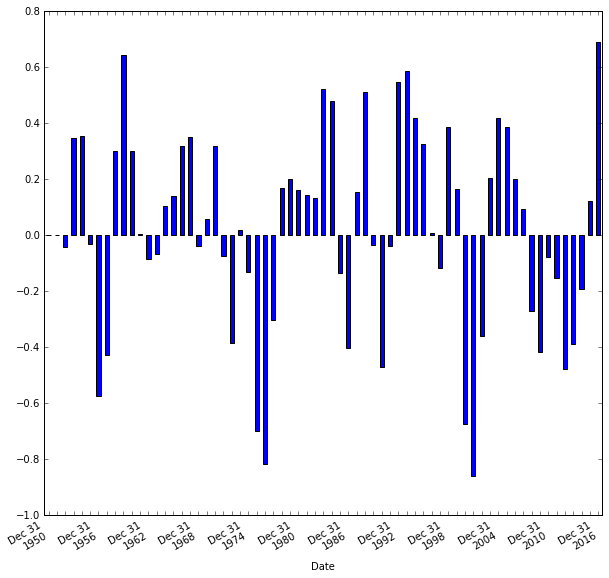

In [13]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
# Grafico rentabilidad, rentabilidad acumulada y valor cuota promedio periodo
# Periodos : W week, , M month, Q quarter, A year
period = 'A'
# Promedio del periodo
df = nino34.ANOM.rolling(window=30,center=False).mean()
# Grafo rentabilidad
aux = df.resample(period).mean()
fig, ax = plt.subplots(figsize=(10,10))
aux.plot(kind='bar', ax=ax)
# Fix date format on bar plot with pandas
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(aux.index)
bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
step = int(len(aux.index)/(width*1.3))
# Every step ticklable shows the month, day and year
ticklabels[::step] = [item.strftime('%b %d\n%Y') for item in aux.index[::step]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()